# Quasar Image Notebook

This is a specialized astrophysics notebook. You are not expected to understand everything in the specialized notebooks, but should understand the basic python commands being used.

This notebook reads a 'fits' file (telescope data format) of a radio telescope observation of a quasar, and displays the resulting image of the radio emission intensity using both a contour map and a false-color image.

In [ ]:
from astropy.io import fits #provides access to fits files
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Items to change each run are in this cell.
from google.colab import drive
drive.mount('/content/drive')
filename = 'drive/My Drive/Notebook05/2018-11-06_0706+592_08.fits' #format is observation date, quasar name, observing frequency in GHz   #change filename when doing exercises
baselevel = 6.13e-5 #CHANGE based on the published contour map.
xrange=(8,-14) #x-axis range, note that it is inverted (positives on left, negatives on right)    #change these 2 x,y range
yrange=(-18,4) #y-axis range

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read data from fits file. Reads both the image data along with a bunch of 'metadata' about the observation
#that gets stored in a dictionary.

with fits.open(filename) as pymap:
     image_data = pymap[0].data
     header = pymap[0].header

npixels = header['NAXIS1']
pixsize = header['CDELT2']*3.6e6
BMAJ = header['BMAJ']*3.6e6
BMIN = header['BMIN']*3.6e6
BPA = header['BPA']

print(image_data.shape)
image_data = np.reshape(image_data,[npixels,npixels]) # reshapes data into 2D numpy array
print(image_data.shape)
print()

print('Number of pixels =',npixels,' x ',npixels)
print(f'Pixel size = {pixsize: .2f} mas')

(1, 1, 1024, 1024)
(1024, 1024)

Number of pixels = 1024  x  1024
Pixel size =  0.10 mas


In [ ]:
#This generates x and y coordinates of pixel centers, based on the number of pixels and the pixel size.
x=np.round(np.linspace((npixels*pixsize)/2-pixsize/2, -(npixels*pixsize)/2+pixsize/2, npixels),decimals=2)
y=-x
print(x[0:2],x[-2:])
print(y[0:2],y[-2:])

[51.15 51.05] [-51.05 -51.15]
[-51.15 -51.05] [51.05 51.15]


In [ ]:
def makeplot(filename,xrange,yrange,baselevel,image_data,BMAJ,BMIN,BPA):

    plt.figure(figsize=(10,10))

    mappeak = np.max(image_data)  #brightest point
    levels=(2**(np.arange(np.floor(np.log2(mappeak/baselevel))+1))).astype(int) #generates contour levels in powers of 2.  np.floor rounds, np.arange produces 0^2,1^2...,9^2
    fluxlevels = baselevel * levels  #baselvel is least brightest point
    plotname = filename.split('/')[-1][:-5]

    plt.title(plotname, fontsize=14)
    plt.tick_params(right=True)
    plt.xlim(xrange)
    plt.ylim(yrange)
    plt.xlabel('Right Ascension (mas)', fontsize=14)
    plt.ylabel('Relative Declination (mas)',fontsize=14)
    plt.figtext(0.1, 0.07, f'\n Map peak: {mappeak:.4f} Jy/beam\n' +
            f' Contours: {baselevel} Jy/beam x {levels} \n Beam FWHM: {BMAJ:.2f} x {BMIN:.2f} mas at {BPA:.2f} degrees ', fontsize=10)

    plt.contour(x,y,image_data,fluxlevels,colors = ['white'],linewidths = 1)

    color_scale = plt.cm.jet # store a color map for python to use
    clipmap = np.clip(image_data, baselevel, None) #clips the image values under baselevel
    logmap = np.log10(clipmap) # take the log base 10 to get a good color scale
    logmap = (logmap - np.min(logmap)) #this will reset the minimum to zero

    cs=plt.imshow(logmap,cmap=color_scale,origin='lower',extent=([npixels*pixsize/2,-npixels*pixsize/2,-npixels*pixsize/2,npixels*pixsize/2]))
    plt.colorbar(cs,shrink=0.8) #displays the intensity pixel level using a colorbar

    plt.savefig(('drive/My Drive/Notebook05/'+plotname+'.pdf'), format='pdf')

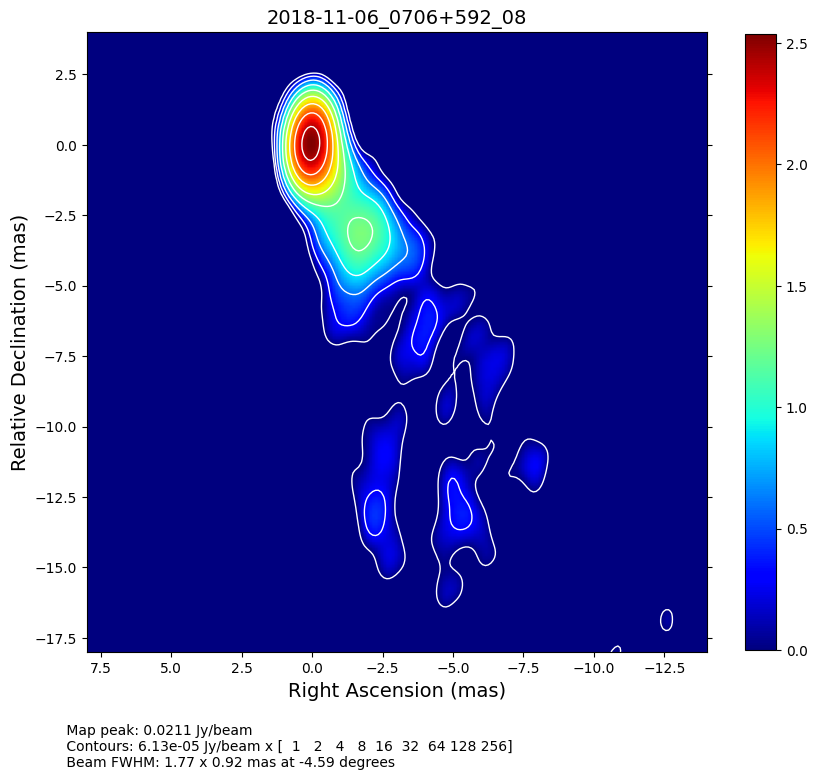

In [ ]:
makeplot(filename,xrange,yrange,baselevel,image_data,BMAJ,BMIN,BPA)

## Exercise 1:
Make a corresponding plot for the quasar 1741+196, observed on 2014-12-09 at 8 GHz, from the included fits file. Use a baselevel of 7.53e-5, an xrange of (21,-3), and a yrange of (-12,12). You will hand in the resulting pdf file.

## Exercise 2:
Make a corresponding plot for the quasar 0706+592, observed on 2018-11-06 at 8 GHz, from the included fits file. Use a baselevel of 6.13e-5, an xrange of (8,-14), and a yrange of (-18,4).
You will hand in the resulting pdf file.

## Exercise 3:
Redo any of the three images done so far, but using a different color map for the color image. The color map is specified above as the "jet" color map in the line that reads "color_scale = plt.cm.jet". For a display of all possible color maps, see https://matplotlib.org/stable/gallery/color/colormap_reference.html. Hint: just change the word "jet" in the specified command to be the name of the new color map. You will hand in the resulting pdf file.

All exercises completed refer to pictures in the folder.